<a href="https://colab.research.google.com/github/eirikngard/GEO4902/blob/master/Access_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Access and plot AROME Arctic weather forecasts

In [ ]:
# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr 

Specify the file on the thredds server. For example the full file of latest forecast of the AROME Arctic weather model. Note, at this point only metadata is retrieved

In [2]:
url='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_full_2_5km_latest.nc'
dataset = xr.open_dataset(url)

Metadata

In [ ]:
dataset

Find a specific point and plot the forecast.
Note AROME Arctic is on an irregular grid, so the xarray.sel functionality does not work:

In [5]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    latlon_idx = np.argmin(c)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [6]:
[ix,jx] = findindex(dataset.latitude,dataset.longitude,78.24,15.46) # For example for Longyearbyen

In [8]:
t2m_point = dataset.air_temperature_2m[:,0,ix,jx]

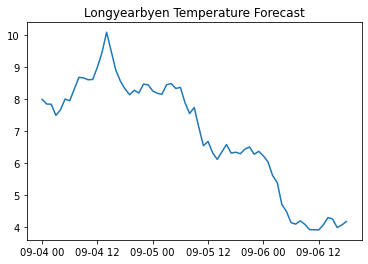

In [10]:
from matplotlib import pyplot as plt

plt.plot(dataset.time, t2m_point-273, '-')

plt.title("Longyearbyen Temperature Forecast")
plt.show()

Plot one forecast on a map

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'extemd'


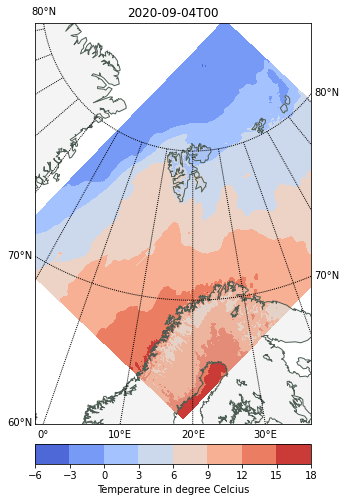

In [11]:
from mpl_toolkits.basemap import Basemap

timestep=0


fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='l', 
            llcrnrlat= 60.0, urcrnrlat=82.0, llcrnrlon=-1.0, urcrnrlon=100.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(dataset.longitude),np.array(dataset.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( dataset.air_temperature_2m[timestep,0,:,:])-273.15,cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(dataset.time[0],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Temperature in degree Celcius')

Explore metedata of other files

In [12]:
url_pp='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_pp_2_5km_latest.nc'
dataset_pp = xr.open_dataset(url_pp)
url_sfx='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_sfx_2_5km_latest.nc'
dataset_sfx = xr.open_dataset(url_sfx)

In [ ]:
dataset_pp

pp has less variables and coordinated than full. What does "pp" mean?

In [ ]:
dataset

In [ ]:
dataset_sfx #This is from SURFEX

Variables of dataset_sfx seems to be off_shore forecast related?

Plotting point forecast from PP and FULL

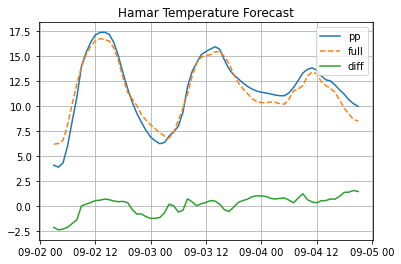

In [ ]:
[ix,jx] = findindex(dataset_pp.latitude,dataset_pp.longitude,60.47,11.40) # Hamar
temp = dataset_pp.air_temperature_2m[:,0,ix,jx]
temp1 = dataset.air_temperature_2m[:,0,ix,jx]

from matplotlib import pyplot as plt

plt.plot(dataset_pp.time, temp-273, '-', label="pp")
plt.plot(dataset.time, temp1-273, '--', label="full")
plt.plot(dataset.time,temp-temp1, label="diff")
plt.legend(), plt.grid()
plt.title("Hamar Temperature Forecast")
plt.show()

Plotting point forecast from SFX

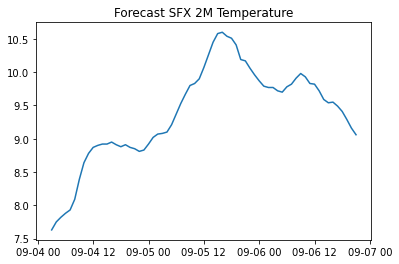

In [15]:
[ix,jx] = findindex(dataset_sfx.latitude,dataset_sfx.longitude,65,65) # Somewhere
temp = dataset_sfx.T2M_SEA[:,ix,jx]
from matplotlib import pyplot as plt

plt.plot(dataset_sfx.time, temp-273, '-')

plt.title("Forecast SFX 2M Temperature")
plt.show()

## Plotting precipitation and temperature forecast for February 04 00:00 UTC for Tromsø  

Point forecast


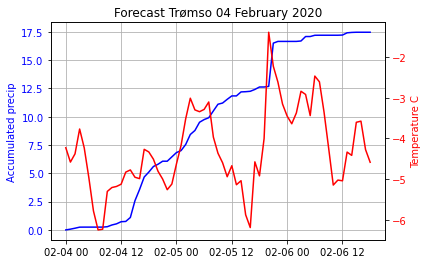

In [16]:
url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/2020/02/04/arome_arctic_full_2_5km_20200204T00Z.nc'
dataset_arc = xr.open_dataset(url)

[ix,jx] = findindex(dataset_sfx.latitude,dataset_sfx.longitude,69.66,18.95) #Tromsø
precip = dataset_arc.precipitation_amount_acc[:,0,ix,jx]
temp = dataset_arc.air_temperature_2m[:,0,ix,jx]

from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.set_ylabel('Accumulated precip',color='b')
ax.plot(dataset_arc.time,precip,color='blue')
ax.tick_params(axis='y',labelcolor='blue')
ax.grid()
ax1 = ax.twinx()
ax1.set_ylabel('Temperature C',color='r')
ax1.plot(dataset_arc.time,temp-273,color='red')
ax1.tick_params(axis='y',labelcolor='red')
plt.title("Forecast Trømso 04 February 2020")
plt.show()

# Map forecast
A bit messy code, just investigating how Colab works

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: The following kwargs were not used by contour: 'extemd'


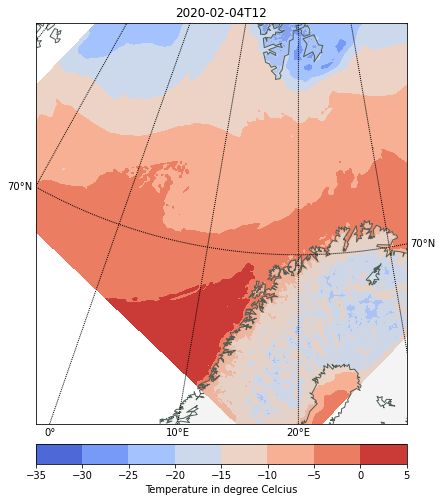

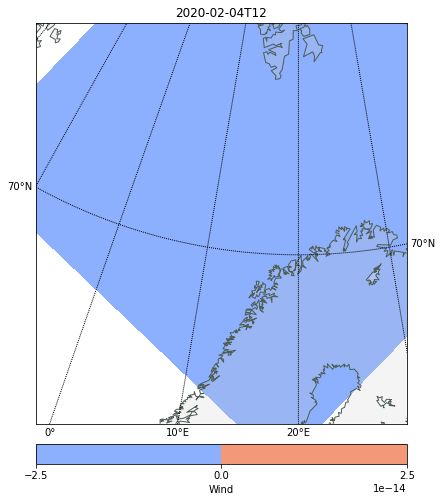

In [78]:
url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/2020/02/04/arome_arctic_full_2_5km_20200204T12Z.nc'
dataset = xr.open_dataset(url)

from mpl_toolkits.basemap import Basemap

timestep=0

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='l', 
            llcrnrlat= 62.0, urcrnrlat=78.0, llcrnrlon=-1.0, urcrnrlon=40.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(dataset.longitude),np.array(dataset.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( dataset.air_temperature_2m[timestep,0,:,:]-273),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(dataset.time[0],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Temperature in degree Celcius')
########################################################################
fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='l', 
            llcrnrlat= 62.0, urcrnrlat=78.0, llcrnrlon=-1.0, urcrnrlon=40.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(dataset.longitude),np.array(dataset.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( dataset.precipitation_amount_acc[timestep,0,:,:]*1000000),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(dataset.time[0],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Wind')

**Why cant I plot precipitation_amount_acc?**

In [ ]:
dataset

# Access and plot AROME MetCoOp and ECMWF IFS forecasts
Example for an extreme precipitation event in October 2014 in West Norway

Specify input fields: AROME MetCoOp and ECMWF IFS forecasts

In [41]:
day='26'; month='10'; year='2014'; HH='12'

url='https://thredds.met.no/thredds/dodsC/aromemetcoopstarc/'+str(year)+'/'+str(month)+'/'+str(day)+'/AROME_MetCoOp_'+str(HH)+'_fp.nc_'+str(year)+str(month)+str(day)
arome = xr.open_dataset(url)

url='https://thredds.met.no/thredds/dodsC/metusers/maltem/GEO4902_2020/Arctic.ECMWF_extracted_'+str(year)+str(month)+str(day)+'T'+str(HH)+'Z.nc'
ecifs =  xr.open_dataset(url)

In [ ]:
ecifs

# Find a specific point and plot the forecast.
Note AROME MetCoOp is on an irregular grid, so the xarray.sel functionality does not work. But it does work for the ECMWF IFS grid (see below)

In [38]:
lat0=60.3833; lon0=5.9500 # Kvamskogen in Western Norway

[ix,jx] = findindex(arome.latitude,arome.longitude,lat0,lon0) # from regional model AROME MetCoOp


The ECMWF IFS precipitation is subdivided into large scale or stratiform precipitation (LSP) and **convective precipitation (TP-LSP)**

In [44]:
pp_acc_point_arome = arome.precipitation_amount_acc[:,0,ix,jx]
pp_acc_point_ecifs = ecifs.sel(lat=lat0,lon=lon0,method='nearest')

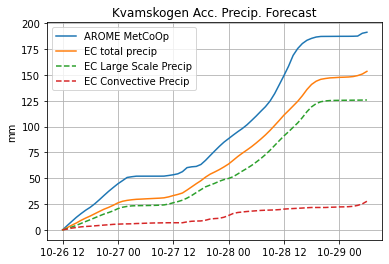

(<matplotlib.legend.Legend at 0x7f2b9f6bd550>, None, None)

In [69]:
plt.plot(arome.time, pp_acc_point_arome, '-',label='AROME MetCoOp')
plt.plot(ecifs.time, pp_acc_point_ecifs.TP*1000,'-',label='EC total precip')
plt.plot(ecifs.time, pp_acc_point_ecifs.LSP*1000,'--',label='EC Large Scale Precip')
plt.plot(ecifs.time, (pp_acc_point_ecifs.TP-pp_acc_point_ecifs.LSP)*1000,'--',label='EC Convective Precip')

plt.title("Kvamskogen Acc. Precip. Forecast")
plt.ylabel("mm")
plt.legend(), plt.grid(), plt.show()

AROME clearly forecasts more accumulated precipitation, and this is probably a result of the higher resolution. Higher resolution model will better capture orographic precipitation and convective precipitaion (if it was any at this day in October) as the scales of these events are to small to be captured proparly by the ECMWF.

# Plot the two accumulated precipitation forecasts on map 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'extemd'


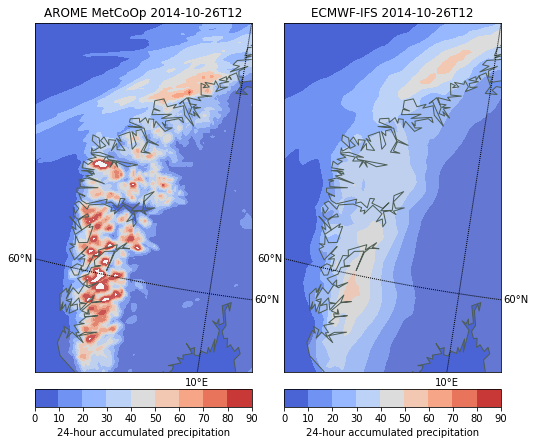

In [48]:
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec

timestep=24 # 24-hour accumulated precipitation
levelsPP = range(0,100,10)

fig = plt.figure(figsize=(7.2,7.2)) 
gs = gridspec.GridSpec(1, 2)
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)

m = Basemap(projection='stere', 
            boundinglat=57, lon_0=20, lat_0=62.4, 
            resolution='l', 
            llcrnrlat= 58.2, urcrnrlat=64.5, llcrnrlon=5.0, urcrnrlon=10.0)

# PLOT (1) REGIONAL MODEL

ax = plt.subplot(gs[0],aspect='equal')
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(arome.longitude),np.array(arome.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( arome.precipitation_amount_acc[timestep,0,:,:]),
              cmap=plt.cm.coolwarm,extemd='max',levels=levelsPP)

plt.title ('AROME MetCoOp '+np.datetime_as_string(arome.time[0],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('24-hour accumulated precipitation')    


# PLOT (2) GLOBAL MODEL
ax = plt.subplot(gs[1],aspect='equal')
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(*np.meshgrid(ecifs.lon,ecifs.lat))
cs=m.contourf(x,y,np.array( ecifs.TP[timestep,:,:]*1000),
              cmap=plt.cm.coolwarm,extemd='max',levels=levelsPP)
plt.title ('ECMWF-IFS '+np.datetime_as_string(ecifs.time[0],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('24-hour accumulated precipitation') 

It is evident from the figure above that the ECMWF clearly cant capture the spatial distribution of precipitation as well as AROME. Orographic effects are poorly captured in ECMWF as the resolution is coarser than AROME. Resolving the fjords and mountains at the west coast is nessecary to capture orographic preciptation on local scale. That being said the ECMWF captures the "broad" precipitaion pattern.  

## Some other variables plotted in map

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: The following kwargs were not used by contour: 'extemd'


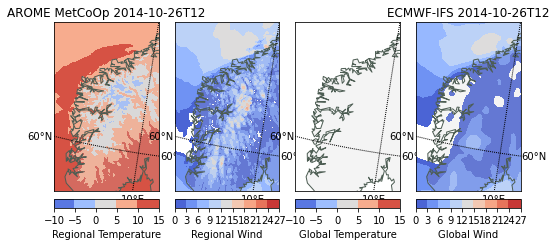

In [65]:
fig = plt.figure(figsize=(7.2,7.2)) 
gs = gridspec.GridSpec(1, 4)
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)

levelsTEMP = range(-10,20,5)
levelsWIND = range(0,30,3)
#levelsPP = range(0,100,10)

# PLOT (1) REGIONAL MODEL

ax = plt.subplot(gs[0],aspect='equal')
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(arome.longitude),np.array(arome.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array(arome.air_temperature_2m[timestep,0,:,:]-273),
              cmap=plt.cm.coolwarm,extemd='max',levels=levelsTEMP)

plt.title ('AROME MetCoOp '+np.datetime_as_string(arome.time[0],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Regional Temperature')    

ax = plt.subplot(gs[1],aspect='equal')
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(arome.longitude),np.array(arome.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array(arome.x_wind_10m[timestep,0,:,:]),
              cmap=plt.cm.coolwarm,extemd='max',levels=levelsWIND)

#plt.title ('AROME MetCoOp '+np.datetime_as_string(arome.time[0],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Regional Wind U')  

# PLOT (2) GLOBAL MODEL
ax = plt.subplot(gs[2],aspect='equal')
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(*np.meshgrid(ecifs.lon,ecifs.lat))
cs=m.contourf(x,y,np.array(ecifs.T2M[timestep,:,:]),
              cmap=plt.cm.coolwarm,extemd='max',levels=levelsTEMP)
#plt.title ('ECMWF-IFS '+np.datetime_as_string(ecifs.time[0],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Global Temperature')

ax = plt.subplot(gs[3],aspect='equal')
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(*np.meshgrid(ecifs.lon,ecifs.lat))
cs=m.contourf(x,y,np.array(ecifs.U10M[timestep,:,:]),
              cmap=plt.cm.coolwarm,extemd='max',levels=levelsWIND)
plt.title ('ECMWF-IFS '+np.datetime_as_string(ecifs.time[0],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Global Wind U')

At least from the wind plot the differneces is large, where the regional model captures higher windspeeds in the mointains. Also, in the large white area of the global wind plot the regional model actualle forecasts some low values instead of 0. In my oppinion the chances of 0 windspeed in an area that large with that topography is very small. 

**Not sure why the temperature T2M of the global model wont plot? Do you know?**